In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [26]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 0.7888349514563107


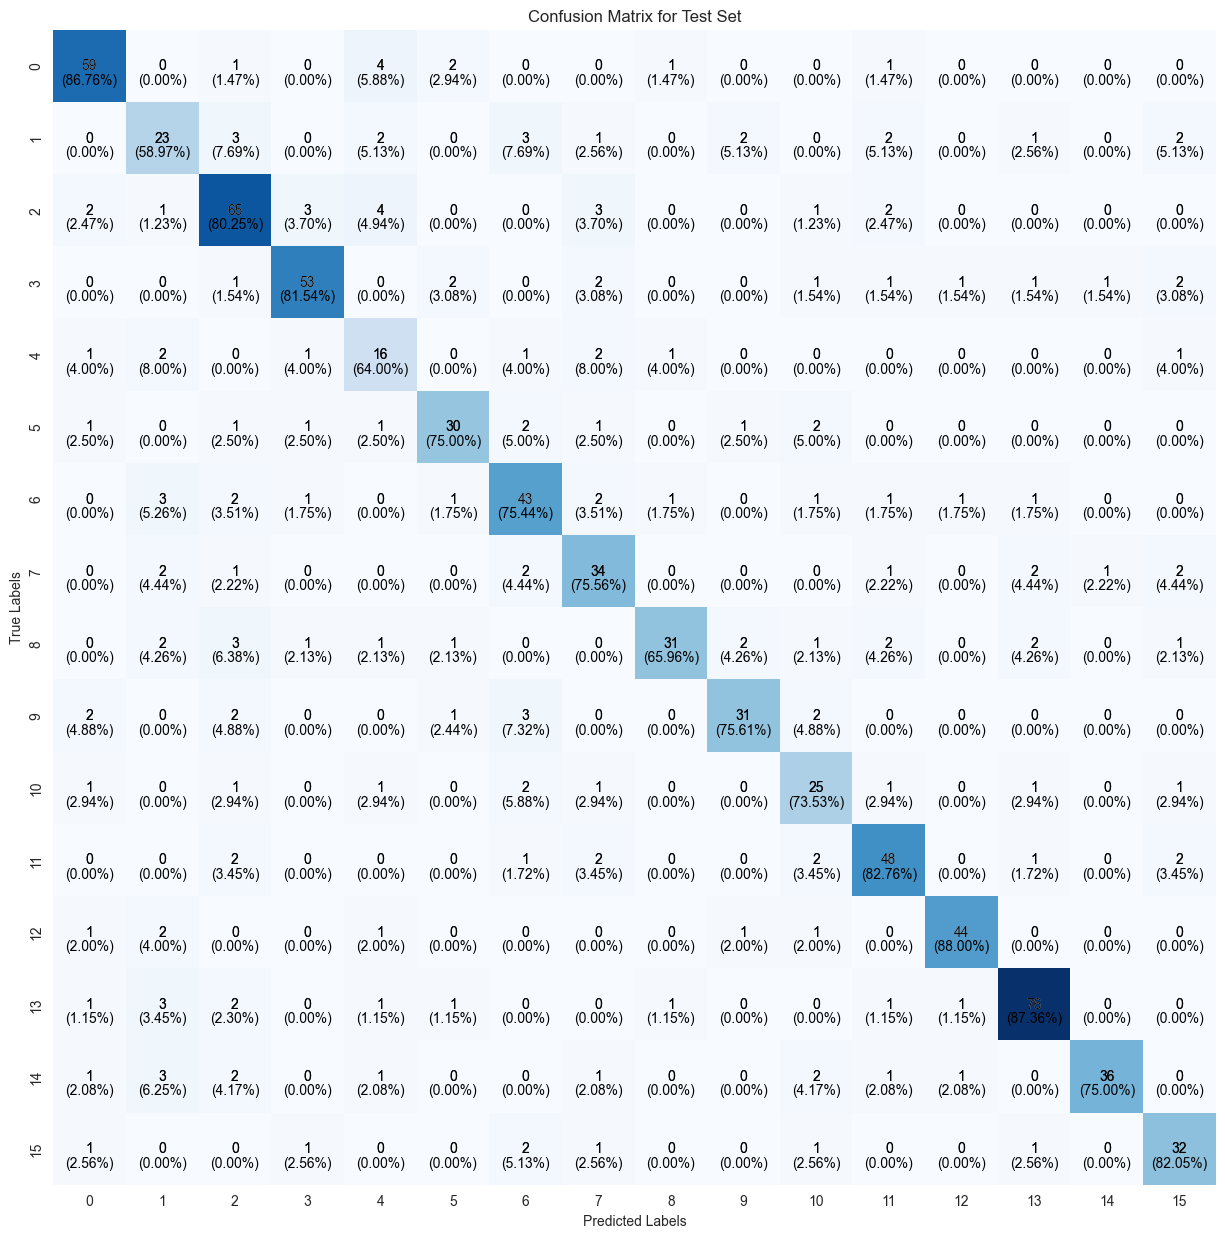

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        68
           1       0.56      0.59      0.57        39
           2       0.76      0.80      0.78        81
           3       0.87      0.82      0.84        65
           4       0.50      0.64      0.56        25
           5       0.79      0.75      0.77        40
           6       0.73      0.75      0.74        57
           7       0.68      0.76      0.72        45
           8       0.89      0.66      0.76        47
           9       0.84      0.76      0.79        41
          10       0.64      0.74      0.68        34
          11       0.79      0.83      0.81        58
          12       0.92      0.88      0.90        50
          13       0.88      0.87      0.88        87
          14       0.95      0.75      0.84        48
          15       0.74      0.82      0.78        39

    accuracy                           0.78       824
   macro avg       0.77   

In [10]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [11]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Self-transcendence    0.085151
Conversation          0.080695
soft_skill_score      0.080557
Openness              0.073964
Hedonism              0.071327
dtype: float64


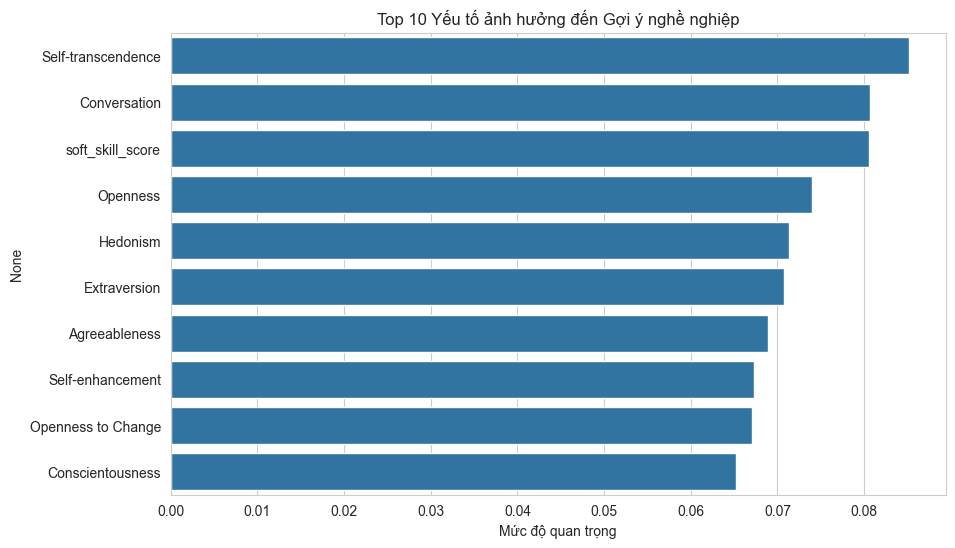

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [14]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [15]:
y = df['Role_encoded']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [18]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 0.7888349514563107


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        68
           1       0.64      0.59      0.61        39
           2       0.80      0.81      0.80        81
           3       0.84      0.82      0.83        65
           4       0.61      0.68      0.64        25
           5       0.86      0.75      0.80        40
           6       0.79      0.77      0.78        57
           7       0.74      0.76      0.75        45
           8       0.91      0.66      0.77        47
           9       0.70      0.76      0.73        41
          10       0.66      0.79      0.72        34
          11       0.72      0.83      0.77        58
          12       0.84      0.86      0.85        50
          13       0.89      0.87      0.88        87
          14       0.82      0.75      0.78        48
          15       0.71      0.82      0.76        39

    accuracy                           0.79       824
   macro avg       0.78   

In [20]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [21]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Self-transcendence    0.091095
Conversation          0.088989
Agreeableness         0.084925
Openness              0.083295
Extraversion          0.081917
dtype: float64


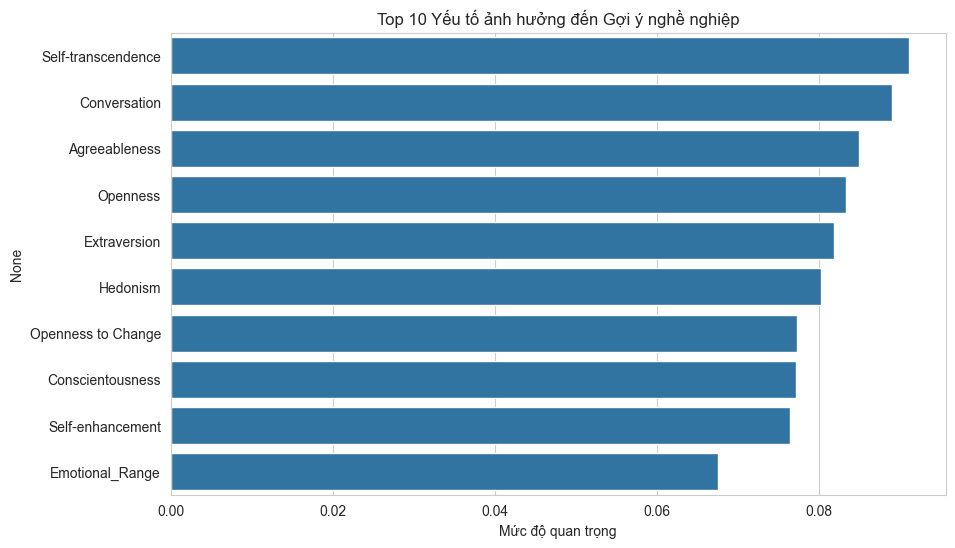

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()